In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lng = zip(lats, lngs)
lat_lng
coordinates = list(lat_lng)

In [3]:
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [5]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
URL = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval   
---------------------------


In [7]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = URL + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. skipping...")
        pass
# Indicate that Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Processing Record 1 of Set 1 | grand river south east
City not found. skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | iguape
Processing Record 4 of Set 1 | altagracia de orituco
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | maceio
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | abu dhabi
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | takoradi
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | marcona
City not found. skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | mandalgovi
City not found. skipping...
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | bredasd

KeyboardInterrupt: 

In [8]:
len(city_data)

45

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,71.73,76,1,12.59,PF,2022-09-22 13:18:18
1,Iguape,-24.7081,-47.5553,64.94,91,100,4.90,BR,2022-09-22 13:18:19
2,Altagracia De Orituco,9.8601,-66.3814,70.02,98,100,1.25,VE,2022-09-22 13:15:22
3,Albany,42.6001,-73.9662,64.94,91,100,1.01,US,2022-09-22 13:13:24
4,Cape Town,-33.9258,18.4232,63.27,81,75,26.46,ZA,2022-09-22 13:15:47
5,Maceio,-9.6658,-35.7353,81.84,74,75,13.80,BR,2022-09-22 13:14:18
6,Jamestown,42.0970,-79.2353,58.59,58,100,12.66,US,2022-09-22 13:14:36
7,Abu Dhabi,24.4667,54.3667,102.31,50,0,8.05,AE,2022-09-22 13:18:03
8,Chuy,-33.6971,-53.4616,52.66,84,100,10.89,UY,2022-09-22 13:18:21
9,Takoradi,4.8845,-1.7554,80.17,80,92,6.96,GH,2022-09-22 13:18:21


In [10]:
# reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

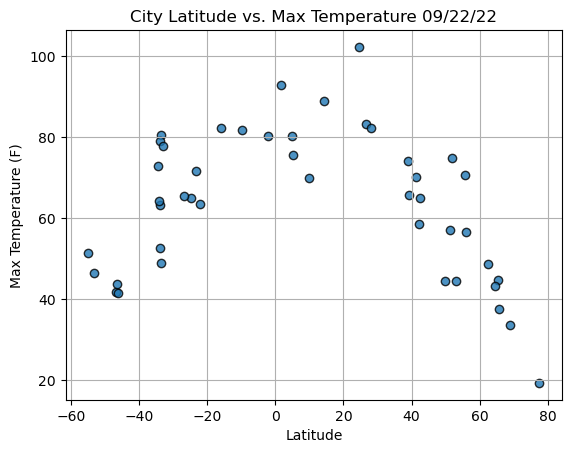

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

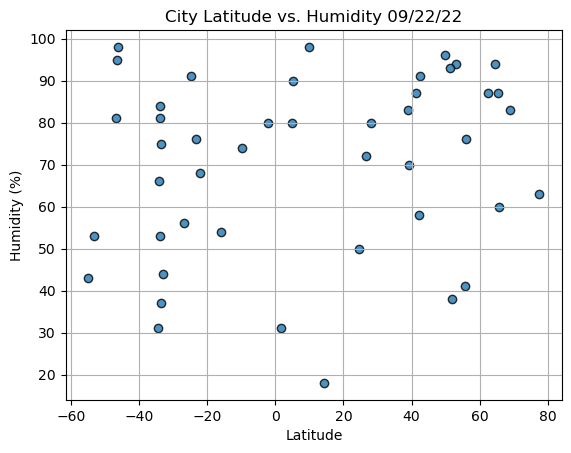

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

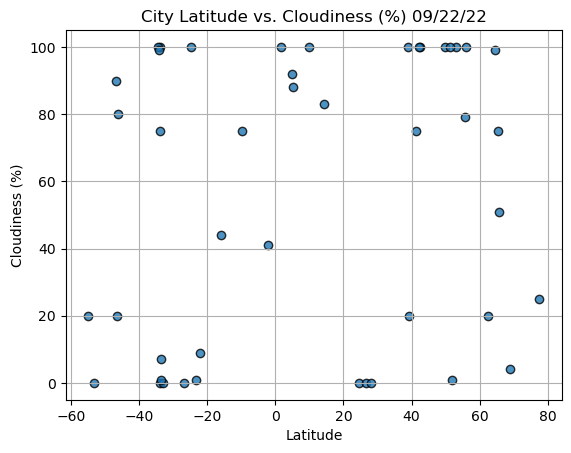

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show Plot
plt.show()

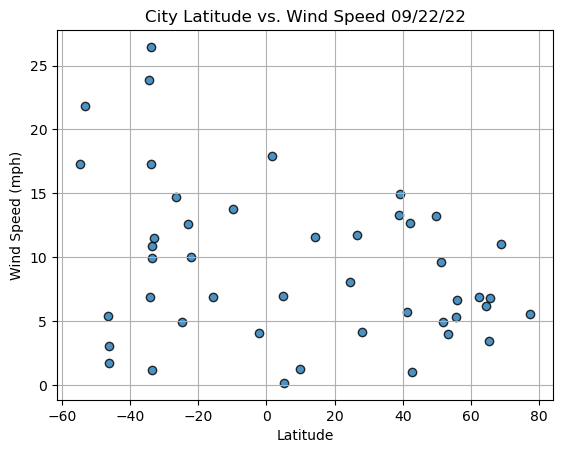

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show Plot
plt.show()